In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

read_data = pd.read_csv("race.csv")
df = pd.DataFrame(read_data)
df.head()



,LoisSanders,AaminahButler,MarwaEnglish,BernardReese,CharleyAcosta,RosemaryMarquez,AwaisMorrow,MuhammadMorris,KadieConner,AlissaJens,GeraldHayden,ElianaSanford,SeanRowe,MarieFerrell,MadihaRojas,StanleyRobertson,LauraHorne,ZeeshanReeves,CandiceMiddleton,BriannaHolde
0,2.814724,2.157613,2.655741,2.706046,2.438744,2.276025,2.751267,2.840717,2.351660,2.075854,2.162182,2.450542,2.106653,2.431414,2.853031,2.417267,2.780252,2.234780,2.547009,2.929386
1,2.905792,2.970593,2.035712,2.031833,2.381558,2.679703,2.255095,2.254282,2.830829,2.053950,2.794285,2.083821,2.961898,2.910648,2.622055,2.049654,2.389739,2.353159,2.296321,2.775713
2,2.126987,2.957167,2.849129,2.276923,2.765517,3.268059,2.505957,3.065087,2.585264,2.530798,2.311215,2.763251,2.004634,2.181847,2.350952,2.902716,2.241691,2.803592,2.744693,2.486792
3,2.913376,2.485376,2.933993,2.701003,2.795200,2.162612,3.223806,2.243525,3.275713,3.159830,2.528533,2.913337,3.434300,2.688297,2.513250,2.944787,2.403912,2.015403,2.188955,2.435859
4,2.632359,2.800280,3.532818,2.097132,2.186873,2.118998,2.890903,2.929264,2.917194,2.934011,2.796755,2.152378,2.817303,2.145539,2.401808,3.235169,2.096455,2.043024,3.000985,2.446784


In [6]:
# formating data
# Maximum lap per columns in dataframe
maximum = df.max(axis=0)

# Sorting the Series in Descending order

S1 = pd.Series(index=df.columns, data=maximum)
s1_sorted = S1.sort_values(ascending=False)
s1_sorted


# Formating the data below the max by their delay
# We will be processing the difference in between rows
# Function calculating the delay according to the max lap
def delay(series):
    i = int
    for i in range(1,series.size):
        series.iloc[i]=series.iloc[i]-series.iloc[0]
    return series


s1_complete= delay(s1_sorted)

s1_complete

# Now the data is Sorted from Max and followed by the delayed timelaps
# Formatting data time into (hh:mm:ss) with DataFrame

df_complete = pd.DataFrame(s1_complete)

df_complete.index= np.arange(0,20)

df_complete["Racers"]=s1_complete.index

df_complete.iloc[:,1]=df_complete.iloc[:,0]
df_complete.iloc[:,0]=s1_complete.index

df_complete.columns=["Racers","mm:ss:ms"]

df_complete

# Building a Function to format the data in (hh:mm:ss)

def formating(dataframe):
    for i in range(0,20):
        # hours and minutes parts
        h,m = divmod(dataframe.iloc[i,1],1)
        mNew = m*100
        # seconds part
        mNew,sec = divmod(mNew,1)
        Nsec = sec*100
        Nsec,k= divmod(Nsec,1)
        dataframe.iloc[i,1]="{}:{}:{}".format(int(h),int(mNew),int(Nsec))
    return dataframe
    
# sorting data from the less delay to the higher 
df_complete.iloc[1:20,1] =df_complete.iloc[1:20,1].sort_values(ascending=True)

df_complete_formting = formating(df_complete)

# Complete data DONE

df_complete_formting









C:\Users\dell\AppData\Local\Temp\ipykernel_17160\328273854.py:37: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_complete.iloc[:,1]=df_complete.iloc[:,0]


,Racers,mm:ss:ms
0,MarwaEnglish,3:53:28
1,AaminahButler,-1:26:39
2,SeanRowe,-1:27:7
3,CharleyAcosta,-1:32:2
4,LoisSanders,-1:37:78
5,KadieConner,-1:41:74
6,RosemaryMarquez,-1:43:82
7,StanleyRobertson,-1:46:33
8,AwaisMorrow,-1:46:81
9,AlissaJens,-1:53:22


Text(0.5, 0.98, 'Winner / Average TimeLaps')

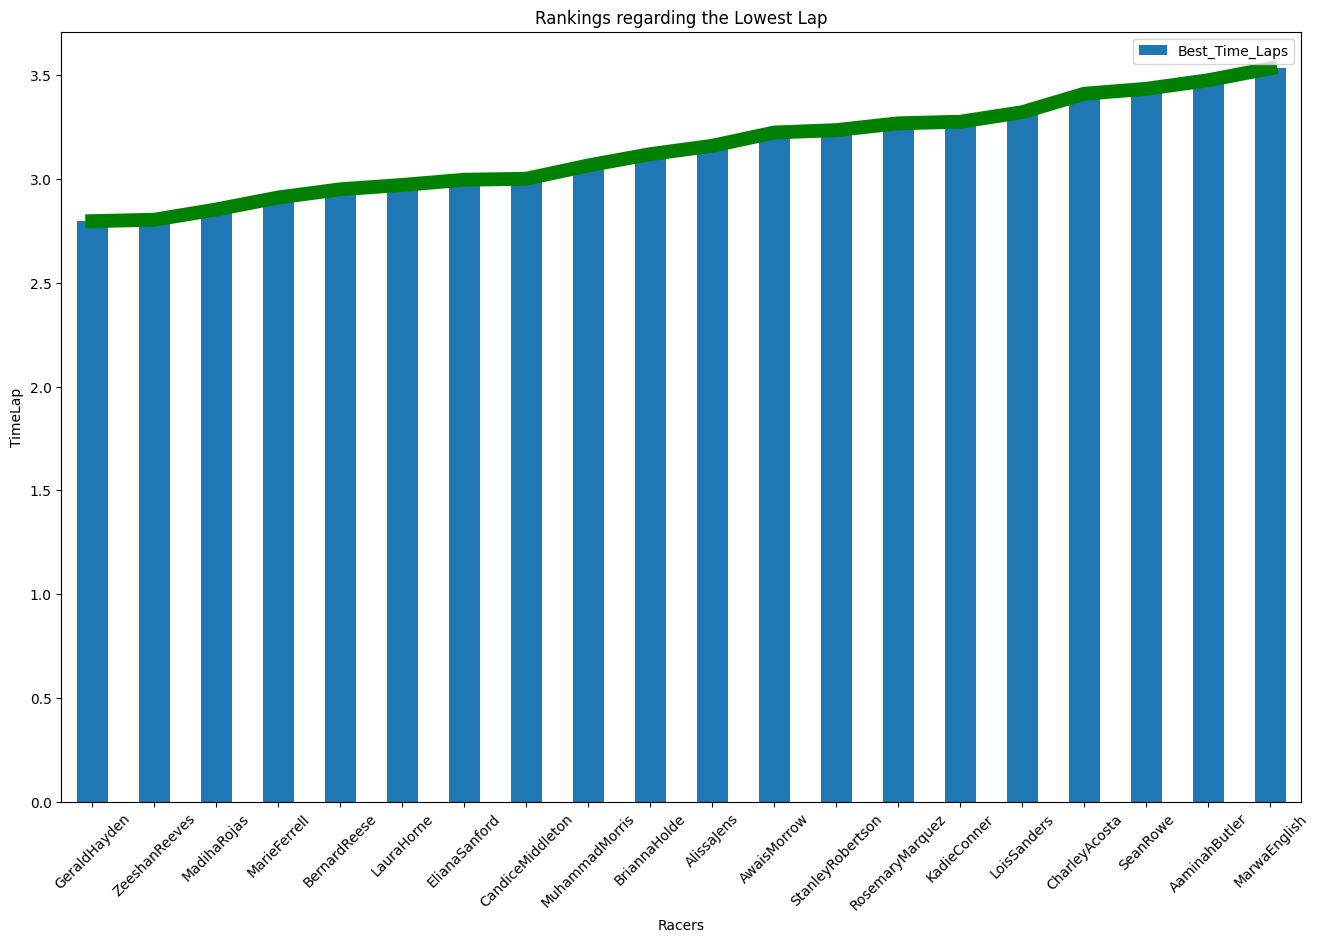

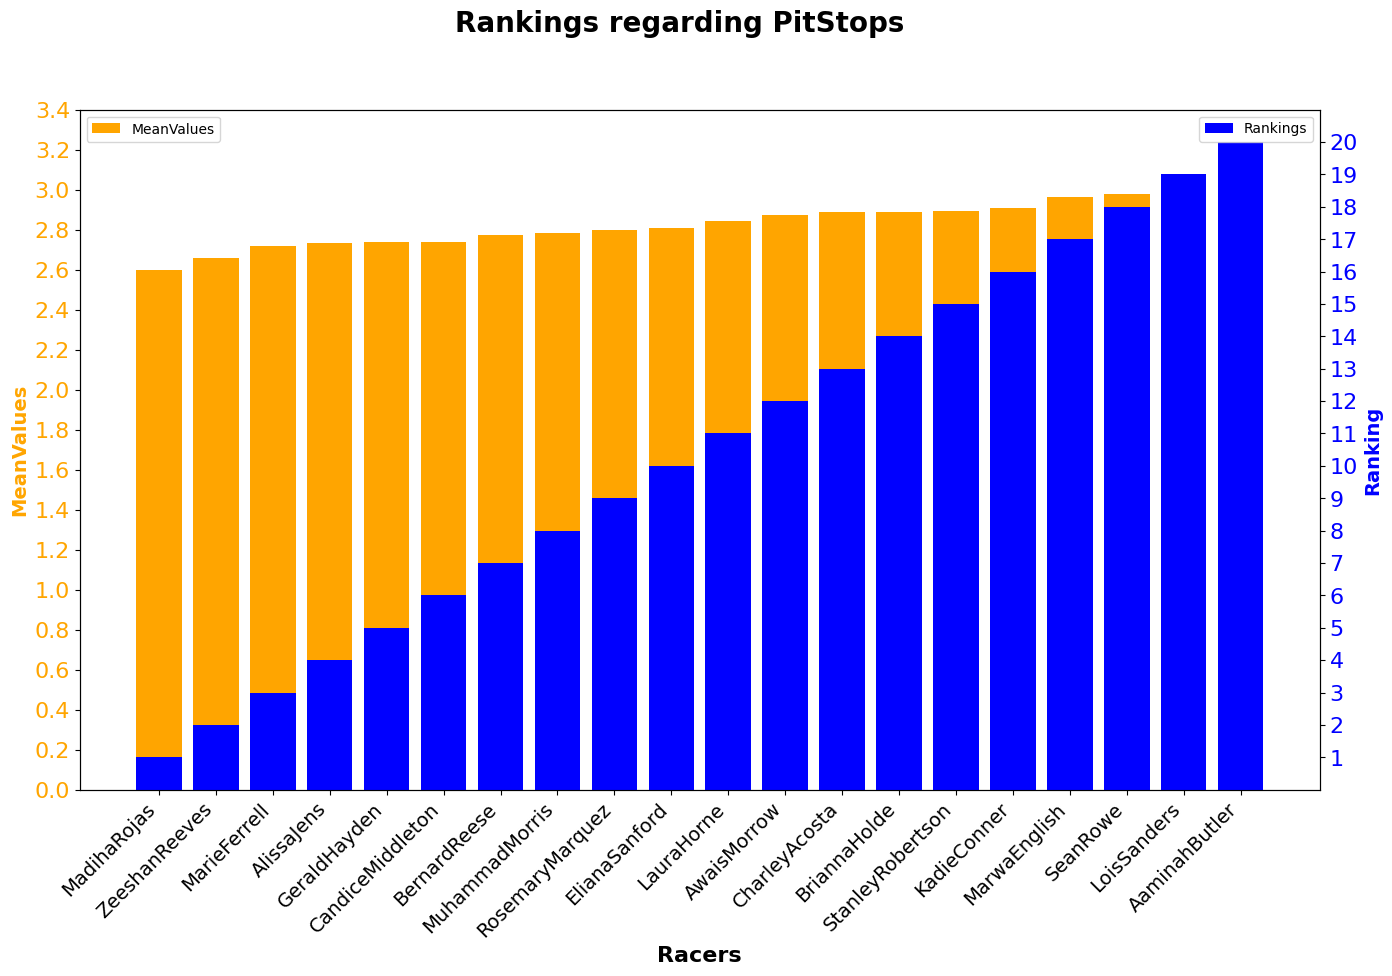

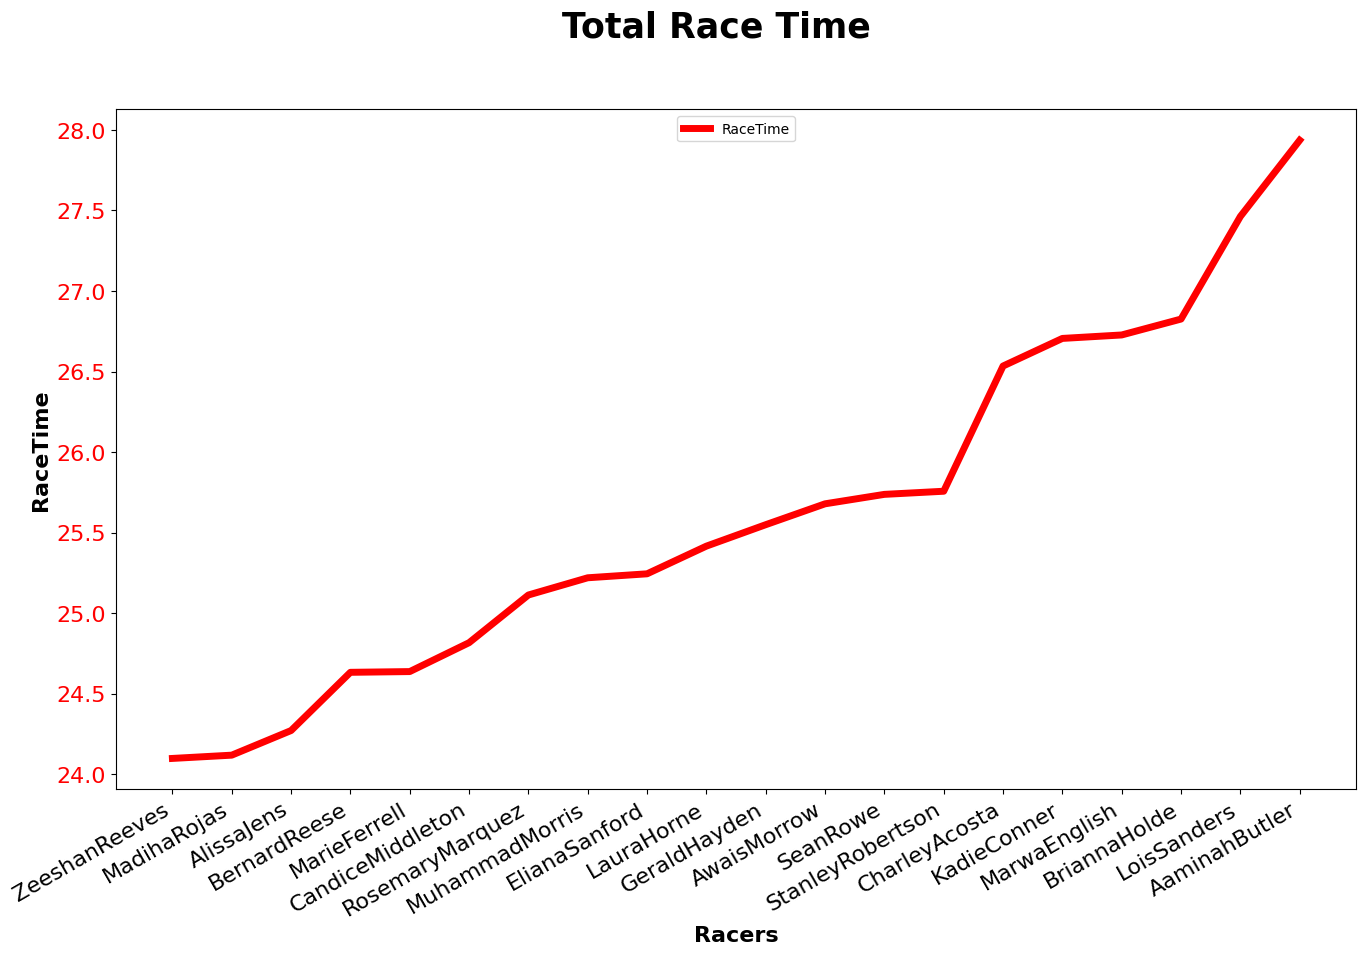

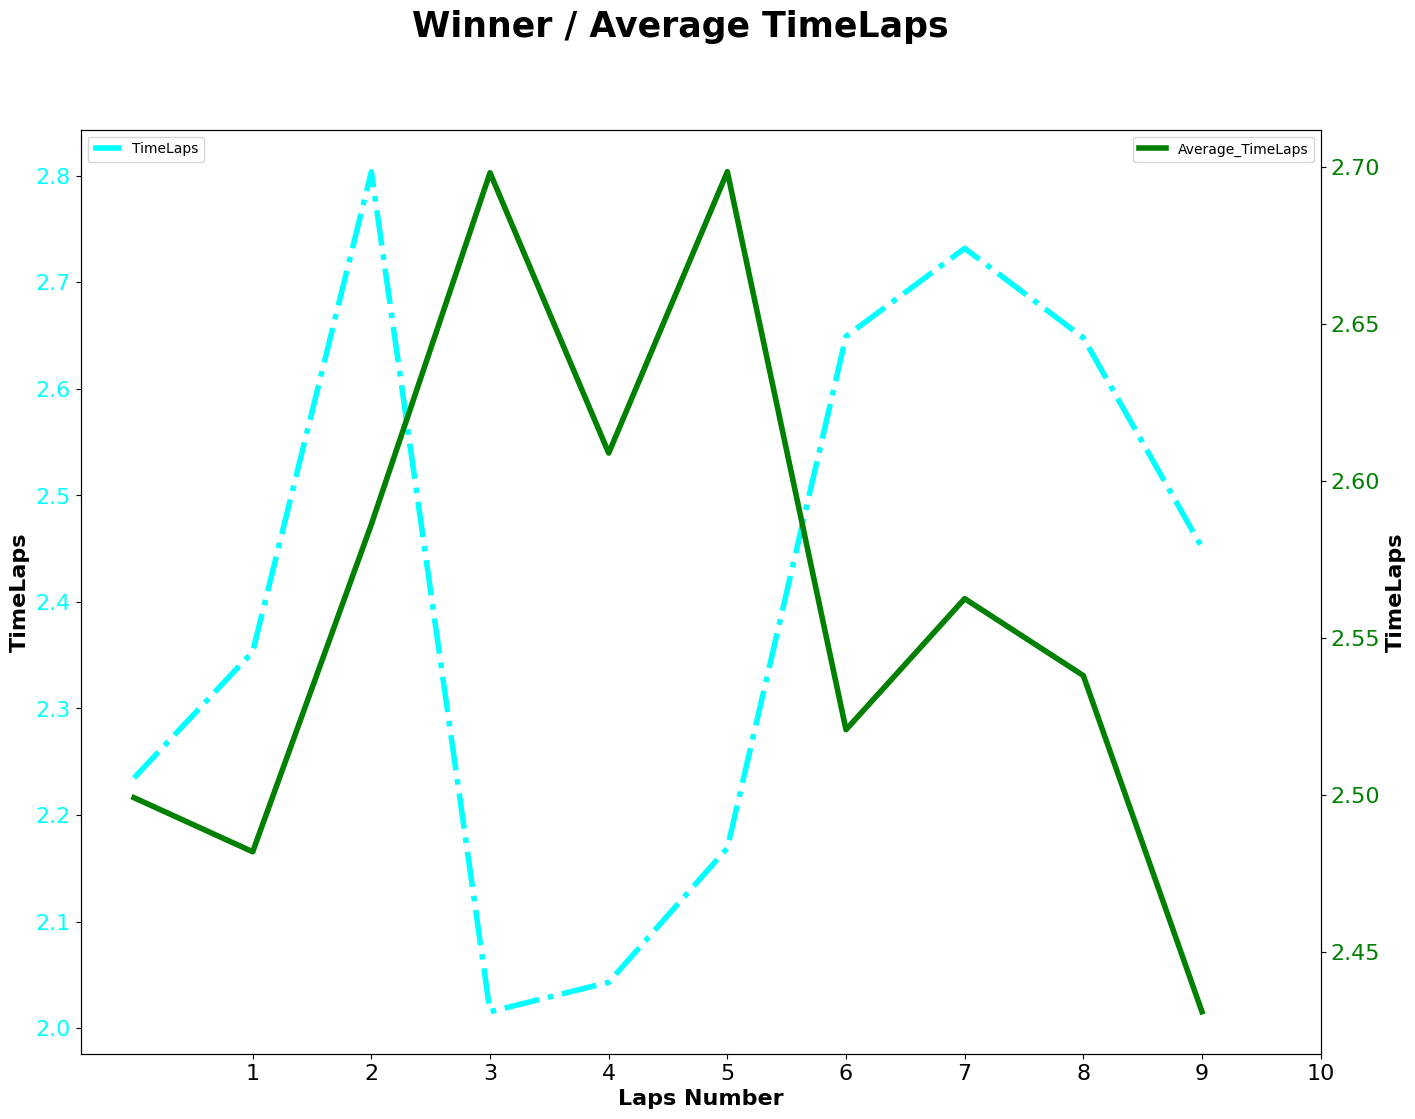

In [221]:
# Building the bar graphs of the racers with their bests time laps

data_vis1 = pd.DataFrame(maximum.sort_values(ascending=True),columns=["Best_Time_Laps"])



data_vis1.plot.bar(xlabel= "Racers",ylabel="TimeLap",rot=45,figsize=(16,10))
plt.plot(df_complete_formting["Racers"],data_vis1,color="green",lw=10)
plt.title("Rankings regarding the Lowest Lap")


# Udentifying the pit stops for each Racer 
# Pit Stops will be selectde by taking the five Highest Laps for each Racer

# Defining a function for this operation


def Pit_stops(dataframe):
    col = dataframe.columns

    empty = pd.DataFrame()

    for i in col:
        a = dataframe[i]
        empty[i] = a.sort_values(ascending=False,inplace=False,ignore_index=True)

    return empty.iloc[:5,:] 

pitStops = Pit_stops(df)
 

# By getting the mean values for the pitstops table's columns
# The lowest pitStop meanValue will consider the BEST TECHNICAL TEAM 

pitstops_mean = pitStops.mean()
Best_Teams = pitstops_mean.sort_values(ascending=True)
Best_Teams_Ranked = pd.DataFrame(Best_Teams,columns=["MeanValues"])
Best_Teams_Ranked["Ranking"]=np.arange(1,21)

Best_Teams_Ranked

# (Data Visualization)
# Bar Graph and an overlay showing the Best Teams with the lowest MeanValues
# Respectivaly with their Rankings

fig, ax1 = plt.subplots(figsize=(16,10))
ax2 = ax1.twinx()

ax1.bar(Best_Teams_Ranked.index,Best_Teams_Ranked["MeanValues"],color="orange",label="MeanValues")
ax2.bar(Best_Teams_Ranked.index,Best_Teams_Ranked["Ranking"],color="blue",label="Rankings")

ax1.set_xlabel("Racers",fontsize=16,fontweight="bold")
ax1.tick_params(axis="x",labelsize=14)
ax1.set_ylabel("MeanValues",color="orange",fontsize=14,fontweight="bold")
ax1.tick_params(axis="y",labelcolor="orange",labelsize=16)
ax1.set_yticks(np.arange(0,3.5,0.2))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax2.set_ylabel("Ranking",color="blue",fontsize=14,fontweight="bold")
ax2.tick_params(axis="y",labelcolor="blue",labelsize=16)
ax2.set_yticks(np.arange(1,21,1))


fig.suptitle("Rankings regarding PitStops",fontsize=20,fontweight="bold")
fig.autofmt_xdate(rotation=45)

# Let's See the Winner From the overall Race time 
# By summig all the laptimes; the lowest gor the first place 
# plotting data with a line 

sum_columns = df.sum().sort_values(ascending=True)
sum_columns
fig, ax3 = plt.subplots(figsize=(16,10))

ax3.plot(sum_columns,color="red",lw=5,label="RaceTime")
ax3.set_xlabel("Racers",fontsize=16,fontweight="bold")
ax3.set_ylabel("RaceTime",fontsize=16,fontweight="bold")
ax3.tick_params(axis="y",labelcolor="red",labelsize=16)
ax3.tick_params(axis="x",labelcolor="black",labelsize=16)
ax3.legend(loc='upper center')

fig.suptitle("Total Race Time",fontsize=25,fontweight="bold")
fig.autofmt_xdate()

# Comparing in one plot the winner lapTimes and average lapTimes
# This the average laptimes by getting the mean of rows in dataframe
average_laps = df.mean(axis=1)
 

# The winner laptimes
winner_laps = df["ZeeshanReeves"]

fig, ax4= plt.subplots(figsize=(16,12))
ax5= ax4.twinx()

ax4.plot(winner_laps.index,winner_laps,label="TimeLaps",color="aqua",lw=4,linestyle="-.")
ax5.plot(average_laps.index,average_laps,label="Average_TimeLaps",color= "green",lw=4)
ax4.set_xticks(np.arange(1,11,1))

ax4.set_xlabel("Laps Number",fontsize=16,fontweight="bold")
ax4.set_ylabel("TimeLaps",fontsize=16,fontweight="bold")
ax4.tick_params(axis="y",labelcolor="aqua",labelsize=16)
ax4.tick_params(axis="x",labelcolor="black",labelsize=16)
ax4.legend(loc='upper left')
ax5.legend(loc='upper right')

ax5.set_xlabel("Laps Number",fontsize=16,fontweight="bold")
ax5.set_ylabel("TimeLaps",fontsize=16,fontweight="bold")
ax5.tick_params(axis="y",labelcolor="green",labelsize=16)
ax5.tick_params(axis="x",labelcolor="black",labelsize=16)

fig.suptitle("Winner / Average TimeLaps",fontsize=25,fontweight="bold")




